## Neural Networks

Goto choice will be [`keras`](https://keras.io/), but we'll work with `sklearn` today.`

In [1]:
import numpy as np

In [2]:
def perceptron(inputs, weights, threshold):
    
    assert len(inputs) == len(weights)
    
    # multiply inputs and weights
    vals = np.multiply(inputs, weights)
  
   
    return 0 if vals.sum() < threshold else 1        

In [3]:
inputs = [[0.0,0.0],[1.0,0.0],[0.0,1.0],[1.0,1.0]]
for input in inputs:
    print(input,perceptron(input, [0.5,0.5], 0.5))

[0.0, 0.0] 0
[1.0, 0.0] 1
[0.0, 1.0] 1
[1.0, 1.0] 1


In [4]:
inputs = [[0.0,0.0],[1.0,0.0],[0.0,1.0],[1.0,1.0]]
for input in inputs:
    print(input,perceptron(input, [0.5,0.5], 1.0))

[0.0, 0.0] 0
[1.0, 0.0] 0
[0.0, 1.0] 0
[1.0, 1.0] 1


In [5]:
import sklearn.datasets as skl_data

In [6]:
data, labels = skl_data.fetch_openml('mnist_784', version=1, return_X_y=True)

/Users/pshriwise/.pyenv/versions/3.10.1/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
print(data.shape)
data.head()

(70000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data /= 255.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42, stratify=labels)
print(X_train.shape)
print(X_test.shape)

(63000, 784)
(7000, 784)


In [11]:
import sklearn.neural_network as skl_nn
mlp = skl_nn.MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, verbose=1, random_state=1)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.50240991
Iteration 2, loss = 0.24293823
Iteration 3, loss = 0.19396647
Iteration 4, loss = 0.16213879
Iteration 5, loss = 0.14071148
Iteration 6, loss = 0.12341883
Iteration 7, loss = 0.10922166
Iteration 8, loss = 0.09774355
Iteration 9, loss = 0.08919639
Iteration 10, loss = 0.08139225
Iteration 11, loss = 0.07540877
Iteration 12, loss = 0.06954664
Iteration 13, loss = 0.06361726
Iteration 14, loss = 0.05979103
Iteration 15, loss = 0.05585580
Iteration 16, loss = 0.05202626
Iteration 17, loss = 0.04899432
Iteration 18, loss = 0.04561763
Iteration 19, loss = 0.04281492
Iteration 20, loss = 0.04050308
Iteration 21, loss = 0.03787670
Iteration 22, loss = 0.03558628
Iteration 23, loss = 0.03292704
Iteration 24, loss = 0.03132445
Iteration 25, loss = 0.02988745
Iteration 26, loss = 0.02857582
Iteration 27, loss = 0.02623057
Iteration 28, loss = 0.02454969
Iteration 29, loss = 0.02335991
Iteration 30, loss = 0.02190347
Iteration 31, loss = 0.02054652
Iteration 32, los

/Users/pshriwise/.pyenv/versions/3.10.1/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, random_state=1, verbose=1)

In [12]:
print("Training set score", mlp.score(X_train, y_train))
print("Testing set score", mlp.score(X_test, y_test))

Training set score 0.9985079365079365
Testing set score 0.97


In [13]:
index = 0
test_digit = X_test.iloc[index].to_numpy().reshape(1,784)
test_digit_prediciton = mlp.predict(test_digit)[0]
print("Predicted value",test_digit_prediciton)
print("Actual value",y_test.iloc[index])

Predicted value 1
Actual value 1


/Users/pshriwise/.pyenv/versions/3.10.1/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


/Users/pshriwise/.pyenv/versions/3.10.1/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/pshriwise/.pyenv/versions/3.10.1/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/pshriwise/.pyenv/versions/3.10.1/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/pshriwise/.pyenv/versions/3.10.1/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/pshriwise/.pyenv/versions/3.10.1/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with featur

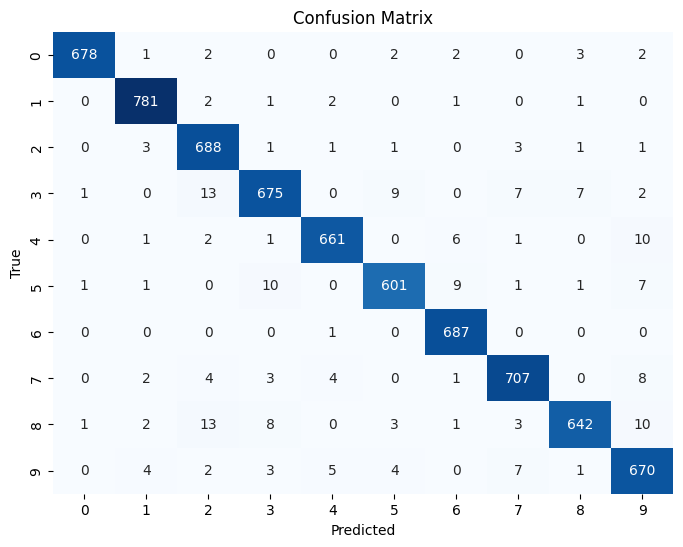

In [15]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

preds = []

for image in X_test.iterrows():
    # image contains a tuple of the row number and image data
    image = image[1].to_numpy().reshape(1,784)
    preds.append(mlp.predict(image)[0])

cm = confusion_matrix(y_test,preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:
mlp2 = skl_nn.MLPClassifier(hidden_layer_sizes=(50), max_iter=50, verbose=1, random_state=1, learning_rate_init=0.01)

mlp2.fit(X_train,y_train)

print("Training set score", mlp2.score(X_train, y_train))
print("Testing set score", mlp2.score(X_test, y_test))

Iteration 1, loss = 0.25712698
Iteration 2, loss = 0.13080252
Iteration 3, loss = 0.10312128
Iteration 4, loss = 0.08895354
Iteration 5, loss = 0.07912970
Iteration 6, loss = 0.07332885
Iteration 7, loss = 0.06368210
Iteration 8, loss = 0.06317413
Iteration 9, loss = 0.05794502
Iteration 10, loss = 0.05782994
Iteration 11, loss = 0.05050052
Iteration 12, loss = 0.05017151
Iteration 13, loss = 0.05017109
Iteration 14, loss = 0.04617367
Iteration 15, loss = 0.04304354
Iteration 16, loss = 0.04542039
Iteration 17, loss = 0.04605360
Iteration 18, loss = 0.04929315
Iteration 19, loss = 0.04344860
Iteration 20, loss = 0.03695632
Iteration 21, loss = 0.03818771
Iteration 22, loss = 0.04330617
Iteration 23, loss = 0.04023585
Iteration 24, loss = 0.03388813
Iteration 25, loss = 0.03667419
Iteration 26, loss = 0.04547819
Iteration 27, loss = 0.02981831
Iteration 28, loss = 0.02967863
Iteration 29, loss = 0.03814344
Iteration 30, loss = 0.03874931
Iteration 31, loss = 0.03444969
Iteration 32, los